# Uma introdução as bibliotecas pyvis e Ipysigma

## A biblioteca pyvis

* Permite criar e visualizar grafos interativos em HTML;
* Baseada na biblioteca JavaScript visJS;
* Oferece diversas opções de layout, estilo, interação e animação para os grafos;
* Pode ser utilizada com outras bibliotecas de análise de grafos do python, como networkx, igraph e graph-tool;
* Permite exportar os grafos em HTML e visualizá-los em qualquer navegador.

Referências:

GitHub - WestHealth/pyvis: Python package for creating and visualizing interactive network graphs

https://github.com/WestHealth/pyvis

Tutorial - GitHub: Let’s build from here

https://github.com/WestHealth/pyvis/blob/master/pyvis/source/tutorial.rst

Pyvis Documentation

http://pyvis.readthedocs.io/en/latest/

## Redes homogêneas não direcionadas 

Possuem as seguintes características:

* São homogêneas porque todos os nós e todas as arestas são do mesmo tipo;

    Por exemplo, uma rede de amigos no Facebook é homogênea, pois todos os nós são pessoas e todas as arestas são relações de amizade.
* São não direcionadas porque as arestas não têm orientação, não há diferença entre ir de um nó para outro ou vice-versa; 

    Por exemplo, uma rede de estradas é não direcionada, pois se pode ir de uma cidade para outra em ambos os sentidos.

* São grafos porque são estruturas matemáticas que representam conjuntos de objetos (nós) e suas relações (arestas); 

    Por exemplo, um grafo pode ser usado para modelar uma rede social, uma rede elétrica, uma rede de computadores, etc.

## Redes Heterogêneas e Dirigidas

Possuem as seguintes características:

* São heterogêneas porque os nós e as arestas podem ser de tipos diferentes; 

    Por exemplo, uma rede de citações bibliográficas é heterogênea, pois os nós podem ser autores, artigos, livros, etc. e as arestas podem ser citações, co-autorias, referências, etc.

* São dirigidas porque as arestas têm orientação, há diferença entre ir de um nó para outro ou vice-versa;

    Por exemplo, uma rede de e-mails é dirigida, é possível enviar ou receber e-mails de outras pessoas.

* E como em redes homogêneas, também são grafos pois representam conjuntos de objetos (nós) e suas relações (arestas).

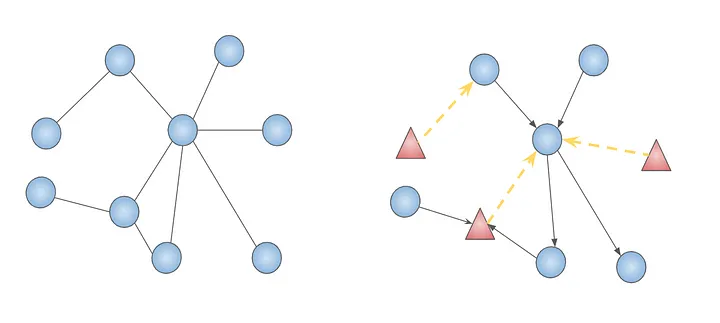


## Instalação

Será necessário instalar duas bibliotecas: Pyvis, Ipysigma e Networkx.

pip install pyvis
pip install ipysigma
pip install networkx

Habiltar extensões do Jupyter, executar:

jupyter nbextension enable --py --sys-prefix ipysigma
jupyter nbextension enable --py --user ipysigma
jupyter nbextension enable --py --system ipysigma

In [5]:
import networkx as nx
import numpy as np
import uuid

def get_new_test_graph():
    # hard code parameters and use seed to replicate same network each time
    NUM_NODES = 50
    p = 0.5
    seed = 1
    test_graph = nx.dual_barabasi_albert_graph(n=NUM_NODES, p=p, seed=1, m1=2, m2=1)

    ### append node properties

    # 1. Compute Node Degree
    nx.set_node_attributes(test_graph, dict(test_graph.degree()), name='degree')
    # 2. Compute betweenness centrality
    nx.set_node_attributes(test_graph, nx.betweenness_centrality(test_graph), name='betweenness_centrality')

    for node, data in test_graph.nodes(data=True):
        # 3. Simulate node level features
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        data['feature3'] = 1 if np.random.random() > 0.5 else 0
        
        # 4. Simulate UIDs as node identifiers
        data['node_identifier'] = str(uuid.uuid4())

    ### append edge properties
    for u, v, data in test_graph.edges(data=True):

        # Simulate edge level features
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
    
    return test_graph



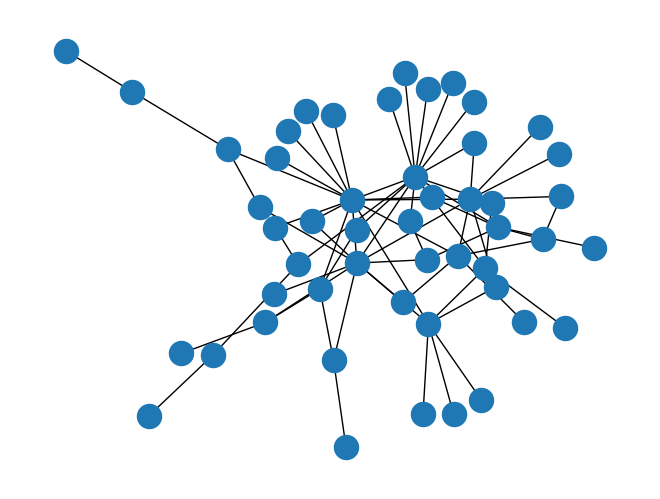

In [6]:
nx.draw(get_new_test_graph())

In [9]:
import ipysigma
sigma = ipysigma.Sigma(get_new_test_graph())

In [10]:
G = nx.karate_club_graph() # Cria um grafo networkx
sigma = ipysigma.Sigma(G) # Passa o grafo para o Sigma